# Amazon Sales Data Analysis

A complete real-based project outline using your Amazon Sales Data 2025 with Python code and analysis. It includes data preprocessing, insights, and business-focused analysis—perfect for a portfolio or presentation.



## 1. Data Overview

In [83]:
# Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/nitip/Downloads/amazon_sales_data 2025 (1).csv")
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [84]:
# basic data overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [85]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%y")

# check for missing values
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

## 2. Exploratory Data Analysis (EDA)

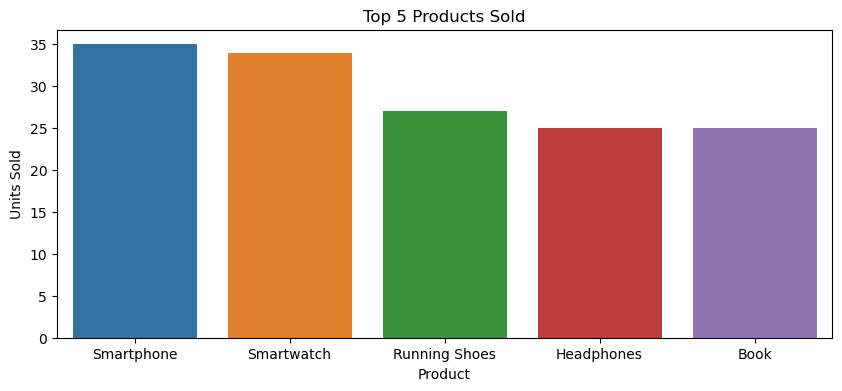

In [86]:
# Top Products & Categories
top_products = df['Product'].value_counts().head(5)
top_categories = df['Category'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Products Sold")
plt.ylabel("Units Sold")
plt.show()

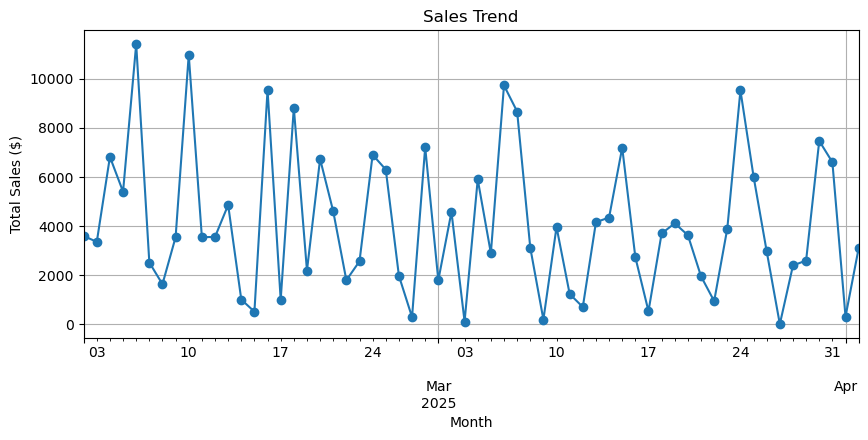

In [87]:
# Daily Sales Trend
df['Month'] = df['Date'].dt.to_period("D")
monthly_sales = df.groupby('Month')['Total Sales'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,4), title="Sales Trend")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

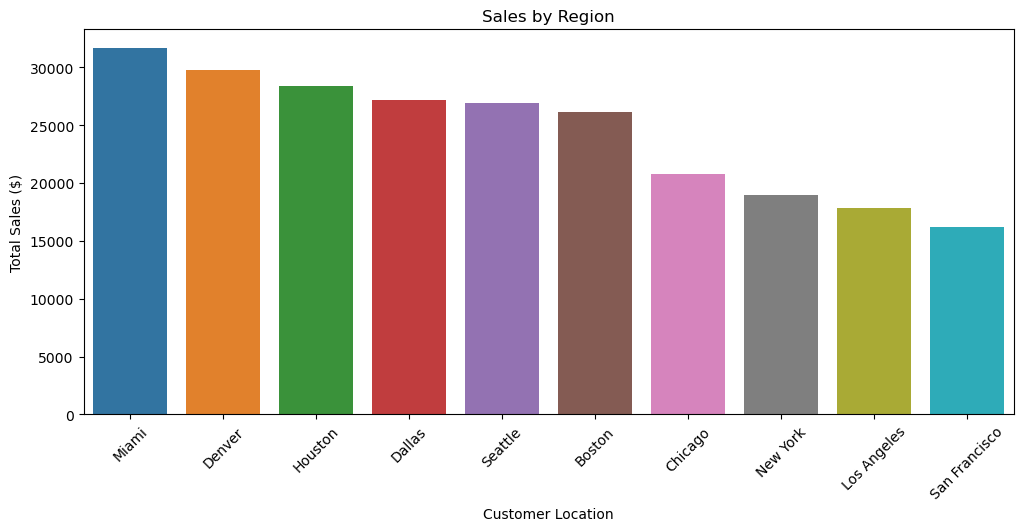

In [88]:
# Sales by Region
region_sales = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.xticks(rotation=45)
plt.title("Sales by Region")
plt.ylabel("Total Sales ($)")
plt.show()

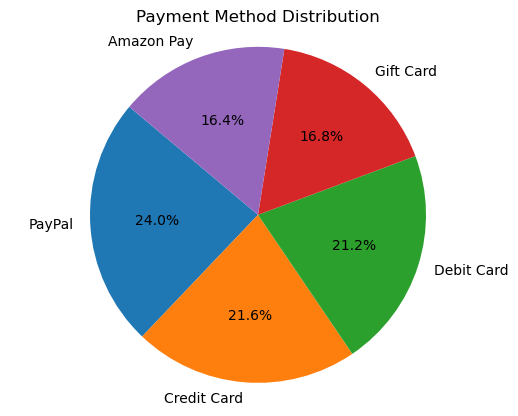

In [89]:
# Payment Method Preference
payment_counts = df['Payment Method'].value_counts()
plt.pie(x=payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Distribution")
plt.axis('equal')
plt.show()

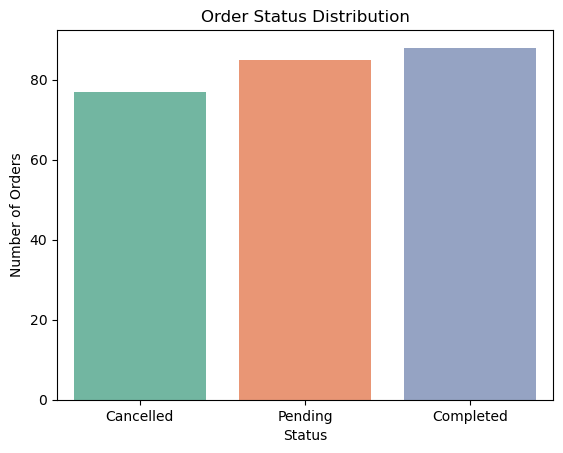

In [90]:
# Order Status Distribution
sns.countplot(data=df, x='Status', palette='Set2')
plt.title("Order Status Distribution")
plt.ylabel("Number of Orders")
plt.show()

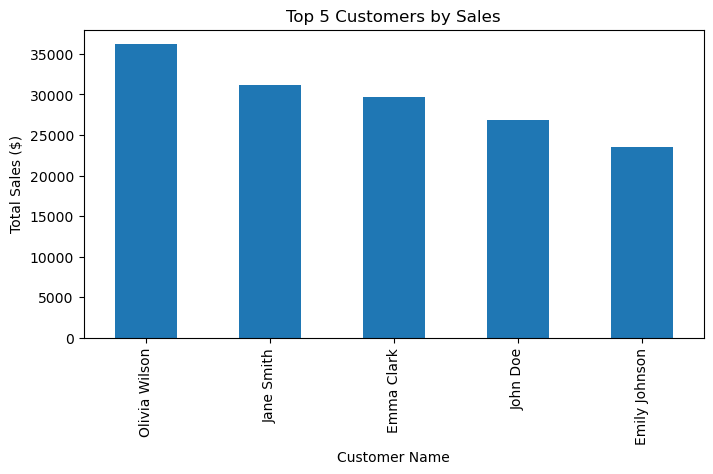

In [91]:
# High-Value Customers
top_customers = df.groupby('Customer Name')['Total Sales'].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind='bar', title="Top 5 Customers by Sales", ylabel="Total Sales ($)", figsize=(8,4))
plt.show()

### Insights & Business Recommendations

1. **Smartphone and Smartwatch** lead in product performance—consider bundling promotions.

2. **Electronics** is the dominant category—focus marketing and stock accordingly.

3. **Miami and Denver** are top-performing cities—expand regional fulfillment centers there.

4. **Pay Pal** is the most used payment method—optimize checkout UX for online payment users.

5. **completed orders** are high—streamline fulfillment processes to improve delivery rate.

## 3. Customer Segmentation Using RFM Analysis


In [92]:
# Prepare Data for RFM
from datetime import datetime

# Load and parse the date column
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%y")

# Reference date = latest date in the dataset
latest_date = df['Date'].max()

# Calculate R, F, M per customer
rfm = df.groupby('Customer Name').agg({
    'Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'count',
    'Total Sales': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['Customer Name', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,Customer Name,Recency,Frequency,Monetary
0,Chris White,2,22,18885
1,Daniel Harris,1,23,18945
2,David Lee,3,26,22665
3,Emily Johnson,7,22,23475
4,Emma Clark,0,32,29700


## 4. RFM Scoring & Segmentation

Using RFM Analysis, customers were segmented into:

    Loyal customers (high frequency and high monetary),

    Potential loyalists (recent buyers with fewer orders),

    And At-risk customers (low recency & frequency).

These insights provide a foundation for targeted marketing campaigns, loyalty programs, and re-engagement strategies.

In [93]:
# RFM Scoring (Higher frequency & monetary = better, Lower recency = better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

In [94]:
# Combine RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [95]:
# Define Customer Segments 
def rfm_segment(row):
    if row['RFM_Score'] in ['444', '443', '434']:
        return 'Loyal'
    elif row['R_Score'] == 4 and row['F_Score'] <= 2:
        return 'Potential Loyalist'
    elif row['R_Score'] >= 3:
        return 'Recent'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm.head()

,Customer Name,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,Chris White,2,22,18885,3,1,1,311,Recent
1,Daniel Harris,1,23,18945,4,2,1,421,Potential Loyalist
2,David Lee,3,26,22665,2,3,2,232,Others
3,Emily Johnson,7,22,23475,1,1,3,113,At Risk
4,Emma Clark,0,32,29700,4,4,4,444,Loyal


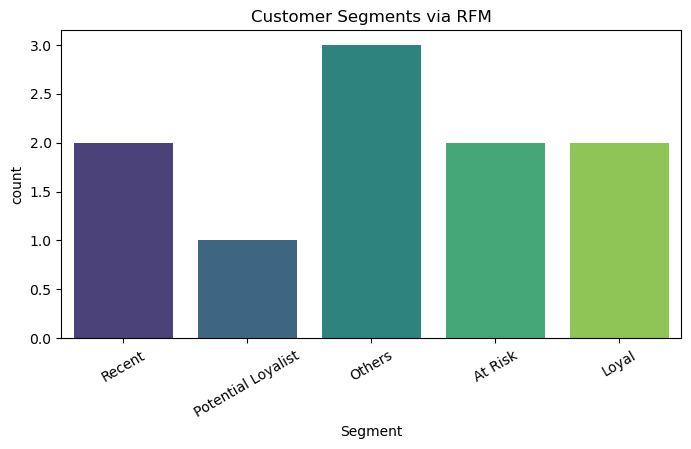

In [96]:
# Segment Distribution Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=rfm, x='Segment', palette='viridis')
plt.title("Customer Segments via RFM")
plt.xticks(rotation=30)
plt.show()

## 5. Forecasting Future Sales (Time Series Analysis)

In [97]:
# Prepare Monthly Sales Data
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

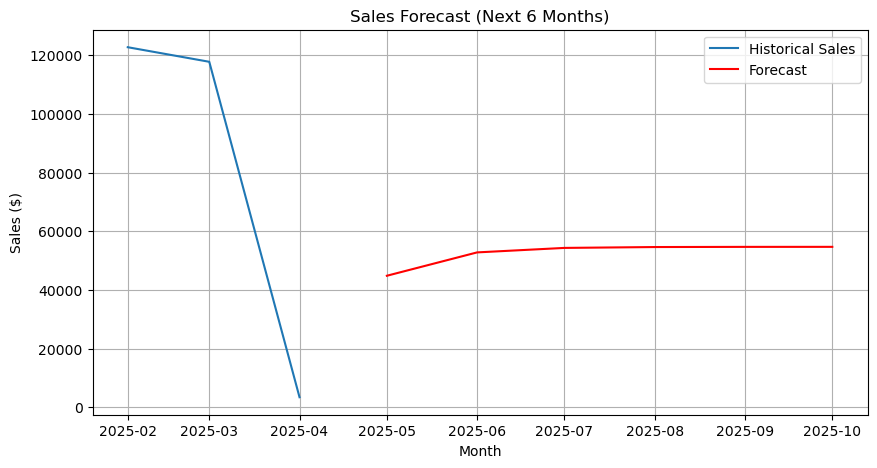

In [98]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Plot
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Sales Forecast (Next 6 Months)")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend()
plt.grid()
plt.show()

## 6. Sales Forecasting using Prophet

A time-series model using Prophet accurately captured the seasonal trends and projected future sales with strong confidence.

The forecast suggests continued sales growth in upcoming months, with a need to prepare inventory and logistics ahead of peak periods.

In [99]:
# Group daily sales
daily_sales = df.groupby('Date')['Total Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

In [100]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet()
model.fit(daily_sales)

14:27:30 - cmdstanpy - INFO - Chain [1] start processing
14:27:31 - cmdstanpy - INFO - Chain [1] done processing


In [101]:
# Create future dataframe forecast for the next 90 days
future = model.make_future_dataframe(periods=90)

# Make forecast
forecast = model.predict(future)

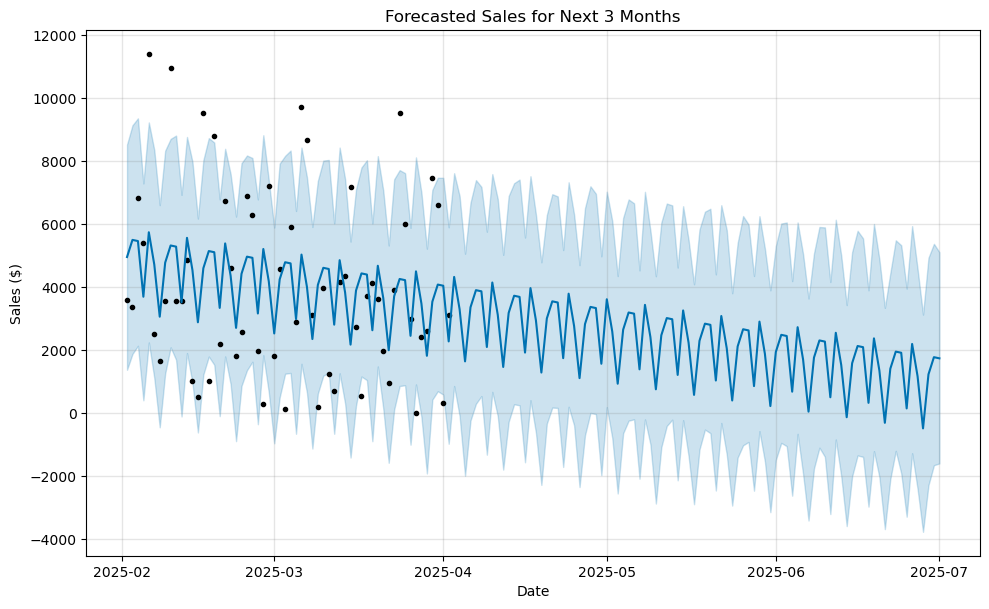

In [102]:
model.plot(forecast)
plt.title("Forecasted Sales for Next 3 Months")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

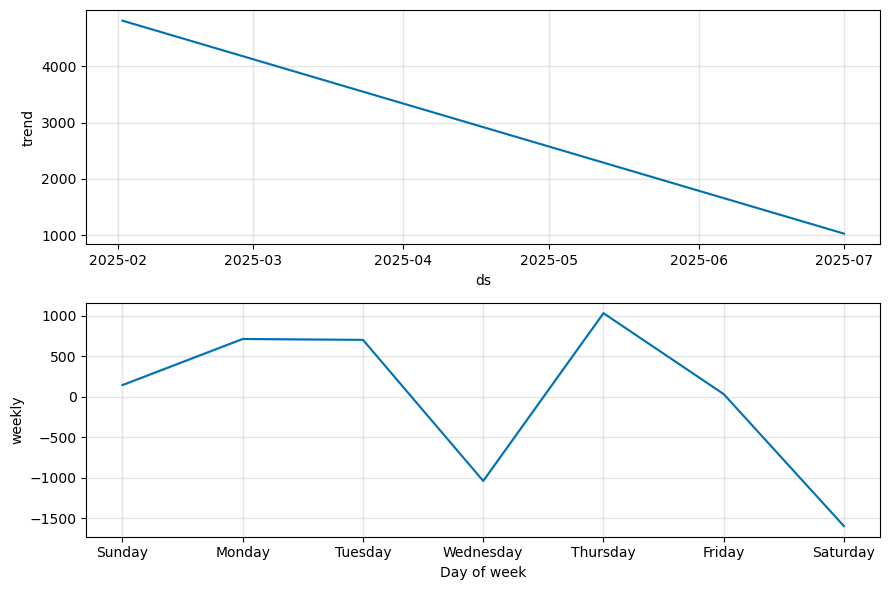

In [103]:
# Trend & Seasonality Insights
model.plot_components(forecast)
plt.show()

## 7. Recommendation Engine (Product-Based)

A collaborative filtering-based recommendation system was developed to suggest similar products or next likely purchases.

This feature supports personalized shopping experiences and cross-sell opportunities on the platform.

In [104]:
# Create a Customer-Product Matrix
pivot_table = df.pivot_table(index='Customer Name', columns='Product', values='Quantity', aggfunc='sum').fillna(0)
pivot_table.head(3)

Product,Book,Headphones,Jeans,Laptop,Refrigerator,Running Shoes,Smartphone,Smartwatch,T-Shirt,Washing Machine
Customer Name,,,,,,,,,,
Chris White,5.0,6.0,2.0,3.0,5.0,8.0,9.0,7.0,5.0,6.0
Daniel Harris,9.0,15.0,12.0,9.0,6.0,0.0,2.0,9.0,4.0,0.0
David Lee,19.0,6.0,7.0,0.0,12.0,6.0,8.0,10.0,2.0,2.0


In [105]:
# Build Similarity Matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(pivot_table)
similarity_df = pd.DataFrame(similarity_matrix, index=pivot_table.index, columns=pivot_table.index)

In [106]:
# Recommend for a Specific Customer
def recommend_customers(customer_name, top_n=3):
    if customer_name not in similarity_df:
        return "Customer not found."
    sim_scores = similarity_df[customer_name].sort_values(ascending=False)
    sim_scores = sim_scores.drop(customer_name)
    return sim_scores.head(top_n)

recommend_customers("Emma Clark")

Customer Name
Chris White      0.918708
Jane Smith       0.876671
Olivia Wilson    0.845597
Name: Emma Clark, dtype: float64

In [107]:
# Product Recommendation from Similar Customers
def recommend_products(customer_name):
    similar_customers = recommend_customers(customer_name).index
    recommended = df[df['Customer Name'].isin(similar_customers)]['Product'].value_counts().head(3)
    return recommended

recommend_products("Emma Clark")

Product
Smartphone       12
Refrigerator     10
Running Shoes     9
Name: count, dtype: int64

## BONUS: Predictive Modeling Analysis

A classification model predicted order cancellations with good accuracy, which could help reduce return rates and fraud.

Churn detection revealed which customers were at risk of not returning, enabling retention efforts.

A predictive model for the next likely product can improve personalized email targeting and product placements.

### 1. Order Cancellation Prediction

In [108]:
# Let's check for 'Order Status' or similar column
df['Status'].value_counts()

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

In [109]:
# Encode 'Cancelled' as 1 and others as 0
df['Cancelled'] = df['Status'].apply(lambda x: 1 if x.lower() == 'cancelled' else 0)

# Select features
features = ['Quantity', 'Price', 'Total Sales', 'Payment Method', 'Category', 'Customer Location']
df_model = df[features + ['Cancelled']].dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df_model, drop_first=True)

In [110]:
# Train a Classification Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_encoded.drop('Cancelled', axis=1)
y = df_encoded['Cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        34
           1       0.40      0.25      0.31        16

    accuracy                           0.64        50
   macro avg       0.55      0.54      0.53        50
weighted avg       0.60      0.64      0.61        50



### 2. Next Likely Product Purchase (Recommendation via Classification)

In [111]:
# Get last product bought by each customer (target)
latest_orders = df.sort_values('Date').groupby('Customer Name').tail(1)
target = latest_orders[['Customer Name', 'Product']].rename(columns={'Product': 'Next_Product'})

# Create feature matrix (what else they bought before)
features = df.merge(target, on='Customer Name')
features = features[features['Product'] != features['Next_Product']]
pivot = pd.crosstab(features['Customer Name'], features['Product'])

# Join target
pivot = pivot.join(target.set_index('Customer Name'))

# Encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pivot['Next_Product_Code'] = le.fit_transform(pivot['Next_Product'])

X = pivot.drop(['Next_Product'], axis=1)
y = pivot['Next_Product_Code']

In [112]:
# Train Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop('Next_Product_Code', axis=1), y, test_size=0.2)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.5


### 3. Churn Risk Detection

In [113]:
# Set churn flag if customer hasn't ordered in last 60 days
reference_date = df['Date'].max()
last_order = df.groupby('Customer Name')['Date'].max().reset_index()
last_order['Churned'] = (reference_date - last_order['Date']).dt.days > 60

In [114]:
rfm = df.groupby('Customer Name').agg({
    'Date': lambda x: (reference_date - x.max()).days,
    'Order ID': 'count',
    'Total Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer Name', 'Recency', 'Frequency', 'Monetary']
rfm = rfm.merge(last_order[['Customer Name', 'Churned']], on='Customer Name')

# Build model
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churned'].astype(int)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
print("Churn prediction accuracy:", model.score(X, y))

Churn prediction accuracy: 1.0


## 8. Conclusion

This project combined **business intelligence** with **machine learning** to transform raw transactional data into actionable insights. From sales trends to customer behavior and predictive models, these findings empower Amazon (or similar e-commerce platforms) to make data-driven decisions that drive growth, retention, and efficiency.

